# Week 1: Introduction to OpenCV

In [ ]:
# Requirements for this tutorial
! pip install opencv-python
! pip install numpy

In [ ]:
# If you prefer, you can convert this notebook to a Python script by uncommenting the following command
! pip install nbconvert
! jupyter nbconvert --to script tutorial-week1.ipynb

In [2]:
import cv2
import numpy as np
import os

dataDir = './data'

1. Images – read, write and display; ROIs

In [9]:
# Opening an image
img = cv2.imread(os.path.join(dataDir, 'ml.jpg'))

# Showing the image
cv2.imshow("ml.jpg", img)

# Waiting for user to press a key to close the image
cv2.waitKey(0)

# Close the window after user pressed a key
cv2.destroyWindow("ml.jpg")

In [3]:
# Check image size
h, w, c = img.shape
print(f'height: {h}')
print(f'width: {w}')
print(f'channels: {c}')

height: 380
width: 308
channels: 3


In [4]:
# Saving image in bmp format
cv2.imwrite('ml_new.bmp', img)

True

In [15]:
# Continue exercises 1 c)

def alter_pixel_callback(event,x,y,flags,param):
    global mouseX,mouseY
    if event == cv2.EVENT_LBUTTONDBLCLK:
        mouseX,mouseY = x,y
        print("Mouse coords: ", mouseX, mouseY)
        px = img[mouseY, mouseX]
        print("RGB VALUES: ", px)
        new_pixel = input("Enter new pixel value: ")
        img[mouseY, mouseX] = list(new_pixel.split(" "))
        cv2.imshow('image', img)

cv2.namedWindow('image')
cv2.setMouseCallback('image',alter_pixel_callback)
# Showing the image
cv2.imshow('image', img)

cv2.waitKey(0)
# Close the window after user pressed a key
cv2.destroyWindow("image")

Mouse coords:  196 122
RGB VALUES:  [255 255 255]
Mouse coords:  201 137
RGB VALUES:  [255 255 255]


In [19]:
# exercise 1 d)

ROI_points = []

def select_points(event,x,y,flags,param):
    global ROI_points
    if event == cv2.EVENT_LBUTTONDBLCLK:
        mouseX,mouseY = x,y
        print("Mouse coords: ", mouseX, mouseY)
        ROI_points.append([mouseX, mouseY])
        if len(ROI_points) == 2:
            point1 = ROI_points[0]
            point2 = ROI_points[1]
            ROI = img[point1[1]:point2[1], point1[0]:point2[0]]
            cv2.imwrite('ROI.bmp', ROI)
            cv2.rectangle(img, (point1[0], point1[1]), (point2[0], point2[1]), (0, 255, 0), 2)
            ROI_points = []
            cv2.imshow('image', img)
cv2.namedWindow('image')
cv2.setMouseCallback('image',select_points)
# Showing the image
cv2.imshow('image', img)

cv2.waitKey(0)
# Close the window after user pressed a key
cv2.destroyWindow("image")


Mouse coords:  36 263
Mouse coords:  155 332
Mouse coords:  72 29
Mouse coords:  168 111
Mouse coords:  177 304
Mouse coords:  269 349
Mouse coords:  196 60
Mouse coords:  258 123
Mouse coords:  200 23
Mouse coords:  292 61
Mouse coords:  115 251
Mouse coords:  16 146


error: OpenCV(4.4.0) D:\Build\OpenCV\opencv-4.4.0\modules\imgcodecs\src\loadsave.cpp:738: error: (-215:Assertion failed) !_img.empty() in function 'cv::imwrite'


2. Images – representation, grayscale and color, color spaces

In [22]:
# Create a white image
m = np.ones((100,200,1), np.uint8)

# Change the intensity to 100
m = m * 100

# Display the image
cv2.imshow('Grayscale image', m)
cv2.waitKey(0)
cv2.destroyWindow('Grayscale image')

In [23]:
# Draw a line with thickness of 5 px
cv2.line(m, (0,0), (100,200), 255, 5)
cv2.line(m, (200, 0), (0, 100), 255, 5)
cv2.imshow('Grayscale image with diagonals', m)
cv2.waitKey(0)
cv2.destroyWindow('Grayscale image with diagonals')

In [26]:
# Continue exercises 2 b), c), d), e) and f)
# Create a white image
m = np.zeros((100,200,1), np.uint8)

# Change the intensity to 100
m = m * 100

# Display the image
cv2.imshow('Grayscale image', m)
cv2.waitKey(0)
cv2.destroyWindow('Grayscale image')

[[[0]
  [0]
  [0]
  ...
  [0]
  [0]
  [0]]

 [[0]
  [0]
  [0]
  ...
  [0]
  [0]
  [0]]

 [[0]
  [0]
  [0]
  ...
  [0]
  [0]
  [0]]

 ...

 [[0]
  [0]
  [0]
  ...
  [0]
  [0]
  [0]]

 [[0]
  [0]
  [0]
  ...
  [0]
  [0]
  [0]]

 [[0]
  [0]
  [0]
  ...
  [0]
  [0]
  [0]]]


3. Video – acquisition and simple processing

In [2]:
# Define a VideoCapture Object
cap = cv2.VideoCapture(0)
if not cap.isOpened():
    print("Cannot open camera")
    exit()

frame_nr = 0
while True:
    # Capture frame-by-frame
    ret, frame = cap.read()
    
    # If frame is read correctly ret is True
    if not ret:
        print("Can't receive frame (stream end?). Exiting ...")
        break

    # Display the resulting frame
    cv2.imshow('webcam', frame)

    # Wait for user to press s to save frame
    if cv2.waitKey(1) == ord('s'):
        frame_name = 'frame' + str(frame_nr) + '.png'
        cv2.imwrite(frame_name, frame)
        cv2.imshow("Saved frame: " + frame_name, frame)
        cv2.waitKey(0)
        cv2.destroyWindow("Saved frame: " + frame_name)

    # Wait for user to press q to quit
    if cv2.waitKey(1) == ord('q'):
        break

    frame_nr += 1

# When everything is done, release the capture
cap.release()
cv2.destroyAllWindows()

In [3]:
# Continue exercises 3 b)

# Define a VideoCapture Object
cap = cv2.VideoCapture(0)


if not cap.isOpened():
    print("Cannot open camera")
    exit()

frame_nr = 0
while True:
    # Capture frame-by-frame
    ret, frame = cap.read()
    
    # If frame is read correctly ret is True
    if not ret:
        print("Can't receive frame (stream end?). Exiting ...")
        break

    # Display the resulting frame
    cv2.imshow('webcam', frame)

    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    cv2.imshow('Grayscale image', gray)

    # Wait for user to press s to save frame
    if cv2.waitKey(1) == ord('s'):
        frame_name = 'frame' + str(frame_nr) + '.png'
        cv2.imwrite(frame_name, frame)
        cv2.imshow("Saved frame: " + frame_name, frame)
        cv2.waitKey(0)
        cv2.destroyWindow("Saved frame: " + frame_name)

    # Wait for user to press q to quit
    if cv2.waitKey(1) == ord('q'):
        break

    frame_nr += 1

# When everything is done, release the capture
cap.release()
cv2.destroyAllWindows()

In [4]:
# Continue exercises 3 c)

# Define a VideoCapture Object
cap = cv2.VideoCapture(0)


if not cap.isOpened():
    print("Cannot open camera")
    exit()

frame_nr = 0
while True:
    # Capture frame-by-frame
    ret, frame = cap.read()
    
    # If frame is read correctly ret is True
    if not ret:
        print("Can't receive frame (stream end?). Exiting ...")
        break

    # Display the resulting frame
    cv2.imshow('webcam', frame)

    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

    ret,thresh = cv2.threshold(gray,128,255,cv2.THRESH_BINARY)

    cv2.imshow('Grayscale image', thresh)

    # Wait for user to press s to save frame
    if cv2.waitKey(1) == ord('s'):
        frame_name = 'frame' + str(frame_nr) + '.png'
        cv2.imwrite(frame_name, frame)
        cv2.imshow("Saved frame: " + frame_name, frame)
        cv2.waitKey(0)
        cv2.destroyWindow("Saved frame: " + frame_name)

    # Wait for user to press q to quit
    if cv2.waitKey(1) == ord('q'):
        break

    frame_nr += 1

# When everything is done, release the capture
cap.release()
cv2.destroyAllWindows()

In [9]:
# Continue exercises 3 d)

# Define a VideoCapture Object
cap = cv2.VideoCapture(0)


if not cap.isOpened():
    print("Cannot open camera")
    exit()

frame_nr = 0
while True:
    # Capture frame-by-frame
    ret, frame = cap.read()
    
    # If frame is read correctly ret is True
    if not ret:
        print("Can't receive frame (stream end?). Exiting ...")
        break


    hsv = cv2.cvtColor(frame, cv2.COLOR_BGR2HSV)
    # define range of color in HSV

    
    lower_black =  np.array([0,0,0])
    upper_black =  np.array([0,0,50])

    lower_white =  np.array([0,0,50])
    upper_white =  np.array([0,0,255])

    lower_blue = np.array([110,50,50])
    upper_blue = np.array([130,255,255])
    # Threshold the HSV image to get only blue colors
    mask = cv2.inRange(hsv, lower_black, upper_black)

    # Bitwise-AND mask and original image
    res = cv2.bitwise_and(frame,frame, mask= mask)
    # Display the resulting frame
    cv2.imshow('webcam', frame)
    cv2.imshow('mask',mask)
    cv2.imshow('res',res)
    

    # Wait for user to press q to quit
    if cv2.waitKey(1) == ord('q'):
        break

    frame_nr += 1

# When everything is done, release the capture
cap.release()
cv2.destroyAllWindows()

In [8]:
#exercises 4 a)

#read an image with openCV 
img = cv2.imread('data/noisy_dog.png', cv2.IMREAD_COLOR)
cv2.imshow('original noisy_dog', img)

dog_with_mean_filter = cv2.blur(img, (3, 3))

cv2.imshow('dog_with_mean_filter', dog_with_mean_filter)

dog_with_gaussian_filter = cv2.GaussianBlur(img, (3, 3), 0)

cv2.imshow('dog_with_gaussian_filter', dog_with_gaussian_filter)

dog_with_median_filter = cv2.medianBlur(img, 3)

cv2.imshow('dog_with_median_filter', dog_with_median_filter)

diameter_pixel_neighbourhood = 5
dog_with_bilateralFilter = cv2.bilateralFilter(img, diameter_pixel_neighbourhood, diameter_pixel_neighbourhood * 2, diameter_pixel_neighbourhood / 2)

cv2.imshow('dog_with_bilateralFilter', dog_with_bilateralFilter)

# Waiting for user to press a key to close the image
cv2.waitKey(0)

# Close the window after user pressed a key
cv2.destroyAllWindows()

In [15]:
#filter defined by me

import os
from matplotlib import pyplot as plt
from scipy import ndimage


img = cv2.imread('data/noisy_dog.png', cv2.IMREAD_COLOR)
# Convert to grayscale if needed
img = cv2.cvtColor(img,  cv2.COLOR_BGR2GRAY) 
# Smooth us ing O penC V Gaus s ianBlur()
gaussianBlurred = cv2.GaussianBlur(img, (3 ,3 ), 0 )
# Smooth using convolution operation coded below
kernel_3x3 = (1/16) * np.array([[1 , 2 , 1 ],[2 , 4 , 2 ],[1 , 2 , 1 ]])
print(kernel_3x3)

myConvolutionResult = ndimage.convolve(img, kernel_3x3 )
# Show res ults
cv2.imshow("Original" , img)
cv2.imshow("OpenCV Gaussian Blur" , gaussianBlurred)
cv2.imshow("My 3 x3 convolution w/Gaussian mask" , myConvolutionResult)
cv2.waitKey(0 )
cv2.destroyAllWindows()

[[0.0625 0.125  0.0625]
 [0.125  0.25   0.125 ]
 [0.0625 0.125  0.0625]]


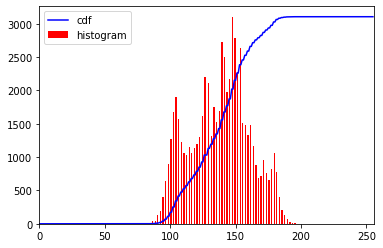

In [10]:
#exercise 5 a)
from matplotlib import pyplot as plt

#read an image with openCV

img = cv2.imread('data/low_contrast_lena.png',0)
hist,bins = np.histogram(img.flatten(),256,[0,256])
cdf = hist.cumsum()
cdf_normalized = cdf * float(hist.max()) / cdf.max()
plt.plot(cdf_normalized, color = 'b')
plt.hist(img.flatten(),256,[0,256], color = 'r')
plt.xlim([0,256])
plt.legend(('cdf','histogram'), loc = 'upper left')
plt.show()

# Waiting for user to press a key to close the image
cv2.waitKey(0)

# Close the window after user pressed a key
cv2.destroyAllWindows()

In [2]:
#exercise 5. b1
img = cv2.imread('data/low_contrast_lena.png',0)

equ = cv2.equalizeHist(img)
res = np.hstack((img,equ)) #stacking images side-by-side
cv2.imshow('res.png',res)

# Waiting for user to press a key to close the image
cv2.waitKey(0)

# Close the window after user pressed a key
cv2.destroyAllWindows()

In [7]:

#exercise 5. b2
img = cv2.imread('data/clahe_1.jpg',0)

clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8,8))
cl1 = clahe.apply(img)

cv2.imwrite('clahe_2.jpg',cl1)

# Waiting for user to press a key to close the image
cv2.waitKey(0)

# Close the window after user pressed a key
cv2.destroyAllWindows()

In [8]:
#exercise 5 c.

def histogram_equalization(img_in):
# segregate color streams
    b,g,r = cv2.split(img_in)
    h_b, bin_b = np.histogram(b.flatten(), 256, [0, 256])
    h_g, bin_g = np.histogram(g.flatten(), 256, [0, 256])
    h_r, bin_r = np.histogram(r.flatten(), 256, [0, 256])
# calculate cdf    
    cdf_b = np.cumsum(h_b)  
    cdf_g = np.cumsum(h_g)
    cdf_r = np.cumsum(h_r)
    
# mask all pixels with value=0 and replace it with mean of the pixel values 
    cdf_m_b = np.ma.masked_equal(cdf_b,0)
    cdf_m_b = (cdf_m_b - cdf_m_b.min())*255/(cdf_m_b.max()-cdf_m_b.min())
    cdf_final_b = np.ma.filled(cdf_m_b,0).astype('uint8')
  
    cdf_m_g = np.ma.masked_equal(cdf_g,0)
    cdf_m_g = (cdf_m_g - cdf_m_g.min())*255/(cdf_m_g.max()-cdf_m_g.min())
    cdf_final_g = np.ma.filled(cdf_m_g,0).astype('uint8')
    cdf_m_r = np.ma.masked_equal(cdf_r,0)
    cdf_m_r = (cdf_m_r - cdf_m_r.min())*255/(cdf_m_r.max()-cdf_m_r.min())
    cdf_final_r = np.ma.filled(cdf_m_r,0).astype('uint8')
# merge the images in the three channels
    img_b = cdf_final_b[b]
    img_g = cdf_final_g[g]
    img_r = cdf_final_r[r]
  
    img_out = cv2.merge((img_b, img_g, img_r))
# validation
    equ_b = cv2.equalizeHist(b)
    equ_g = cv2.equalizeHist(g)
    equ_r = cv2.equalizeHist(r)
    equ = cv2.merge((equ_b, equ_g, equ_r))
    #cv2.imwrite('output_name.png', equ)
    return img_out


img = cv2.imread('data/he_color1.jpg')

equ = histogram_equalization(img)
res = np.hstack((img,equ)) #stacking images side-by-side
cv2.imshow('res.png',res)

# Waiting for user to press a key to close the image
cv2.waitKey(0)

# Close the window after user pressed a key
cv2.destroyAllWindows()

In [3]:
#exercise 6 a)

ddepth = cv2.CV_16S
scale = 1
delta = 0

img = cv2.imread('data/low_contrast_lena.png',0)

# apply gaussian before Sobel



grad_x = cv2.Sobel(img, ddepth, 1, 0, ksize=3, scale=scale, delta=delta, borderType=cv2.BORDER_DEFAULT)
grad_y = cv2.Sobel(img, ddepth, 0, 1, ksize=3, scale=scale, delta=delta, borderType=cv2.BORDER_DEFAULT)

print(grad_x.shape)
print(grad_y.shape)

(256, 256)
(256, 256)


In [4]:
# exercise 6 b) and c)

abs_grad_x = cv2.convertScaleAbs(grad_x)
abs_grad_y = cv2.convertScaleAbs(grad_y)
    
    
grad = cv2.addWeighted(abs_grad_x, 0.5, abs_grad_y, 0.5, 0)

cv2.imshow('Sobel', grad)
cv2.waitKey(0)
cv2.destroyAllWindows()


In [9]:
# exercise 6 d)

window_name = "Threshold_bar"
max_value = 255
max_type = 4
max_binary_value = 255
trackbar_type = 'Type: \n 0: Binary \n 1: Binary Inverted \n 2: Truncate \n 3: To Zero \n 4: To Zero Inverted'
trackbar_value = 'Value'

def threshold_demo(val):
    #0: Binary
    #1: Binary Inverted
    #2: Threshold Truncated
    #3: Threshold to Zero
    #4: Threshold to Zero Inverted
    threshold_type = cv2.getTrackbarPos(trackbar_type, window_name)
    threshold_value = cv2.getTrackbarPos(trackbar_value, window_name)
    _, dst = cv2.threshold(src_gray, threshold_value, max_binary_value, threshold_type )
    cv2.imshow(window_name, dst)


src = cv2.imread('data/low_contrast_lena.png', cv2.IMREAD_COLOR)

# Convert the image to Gray
src_gray = grad

cv2.namedWindow(window_name)
cv2.createTrackbar(trackbar_type, window_name , 3, max_type, threshold_demo)
# Create Trackbar to choose Threshold value
cv2.createTrackbar(trackbar_value, window_name , 0, max_value, threshold_demo)
# Call the function to initialize
threshold_demo(0)
# Wait until user finishes program
cv2.waitKey(0)
cv2.destroyAllWindows()